In [1]:
import numpy as np
from numpy import radians, pi
from lib.cartpolesystem import CartPoleSystem
from lib.cartpoleenv import CartPoleEnv
from lib.colors import Colors
from lib.direct_collocation import DirectCollocation
import time
from time import perf_counter
from matplotlib import pyplot as plt
from scipy.io import savemat

In [2]:
dt = 0.01
g = 9.81

n = 2
system_noise = 0 * np.diag(np.ones(2+2*n))

system = CartPoleSystem(
    (0.0, 0.5, 0.005, -0.8, 0.8, Colors.red),
    (0.2, 8.7e-5, 8.7e-5, 0.02, 0.05, -2400.0, 2400.0, Colors.black),
    [
        (0, 0.1, 0.2, 0.001, Colors.green),
        (0, 0.05, 0.2, 0.001, Colors.blue),
    ],
    g,
    dt,
    "rk4",
    "nonlinear",
    system_noise
)

env = CartPoleEnv(system, dt, g)
env.observation_space.shape

(6, 1)

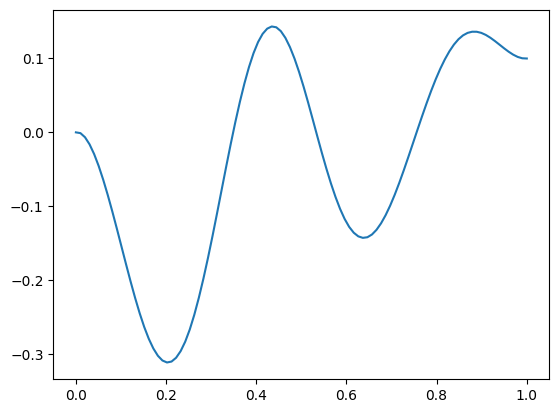

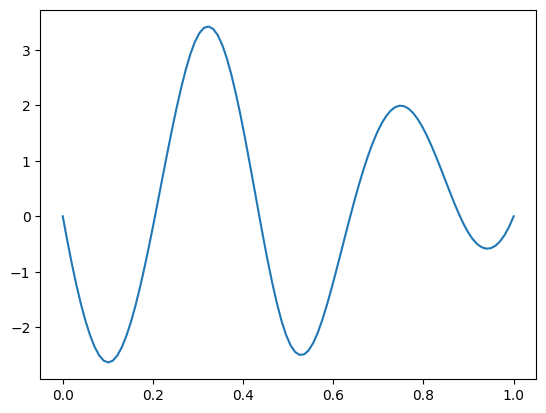

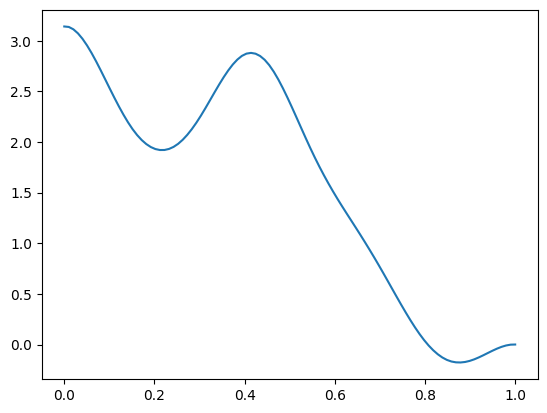

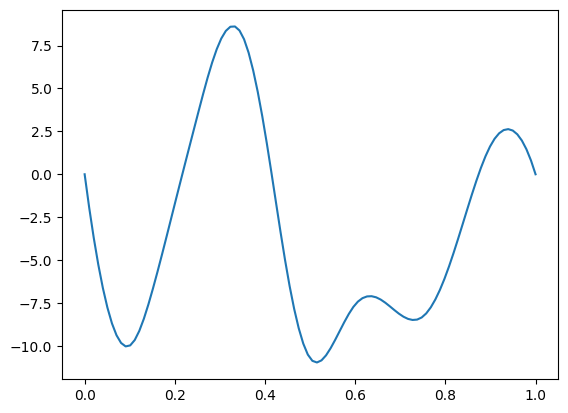

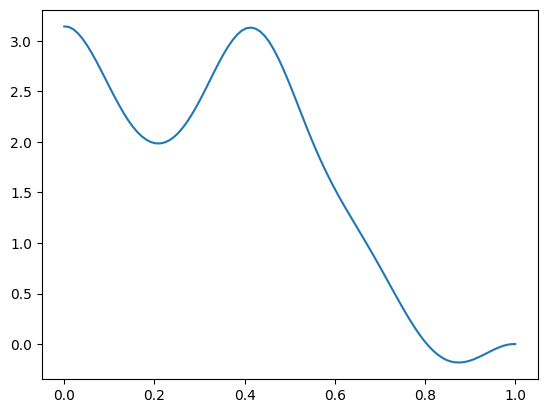

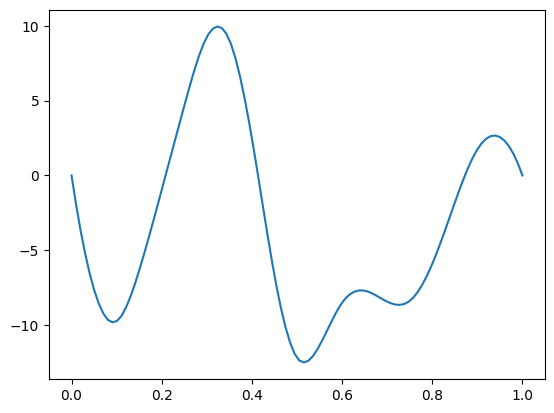

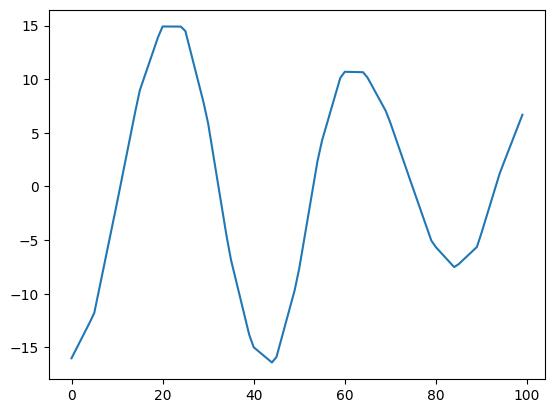

In [5]:
direct_collocation = DirectCollocation(
    21, 
    system.differentiate, 
    env.observation_space.shape[0],
    env.action_space.shape[0]
)

x0 = np.vstack([0, 0, radians(180), 0, radians(180), 0])

r = np.vstack(
    [0.1, 0, 0, 0, 0, 0]
)

end_time = 1
N = int(end_time/dt)

last_update = perf_counter()

state, control = direct_collocation.make_controller(end_time, N, x0, r)

time = np.linspace(0, end_time, N)

for s in state:
    plt.plot(time, s)
    plt.show()
plt.plot(control[0])
plt.show()